# Actividad final

**Nombre**: Marjoris Elena Parejo Castillo, Julio Cesar Rodríguez Cristancho.  
**Asignatura**: Programación para la Ciencia de Datos 💻📈

---

El siguiente informe se realizará utilizando las bases de datos `business` y `economy` que incluyen datos de vuelos. Ambas poseen el mismo número de columnas y se describen a continuación:  
- **date**: Fecha del viaje.
- **airline**: Nombre de la compañia aérea.
- **ch_code**: Información relativa al código de vuelo del avión.  
- **num_code**: Información relativa al código de vuelo del avión.  
- **dep_time**: Hora de salida.
- **from**: Ciudad de origen.
- **time_taken**: Duración del viaje.  
- **stop**: Paradas entre ciudad de origen y destino (escalas).
- **arr_time**: Hora de llegada.   
- **to**: Ciudad de destino.
- **price**: Precio del vuelo.


In [60]:
#Se importa la librería pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Se cargan las dos bases de datos y se observa la información de los dos dataframes creados
df1= pd.read_csv('business.csv')
df2= pd.read_csv('economy.csv')
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3  

In [62]:
#Se observan las primeras filas de cada dataframe para conocer la estructura de los registros
df1.head()
df2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


Para unir los dos dataframe se crea una columna llamada `class` con los valores de cada clase.

In [64]:
#Creación de nueva columna
df1['class']='business'
df2['class']='economy'

In [65]:
#Se unen los dos dataframes y se visualizan las primeras filas de este para verificar la estructura
df3 = pd.concat([df1, df2], ignore_index=True)
df3.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,23:55,Mumbai,"46,690",business


Se puede notar que la columna `stop` contiene el caracter \n que representa saltos de línea y puede generar errores en el análisis posterior, por esto se eliminaran.

In [67]:
# Se limpia la columna 'stop' eliminando los caracteres no deseados
df3['stop'] = df3['stop'].str.split('\n').str[0].str.strip()

# Verificar si todos los valores han sido limpiados
if df3['stop'].str.contains('\n').any():
    print("❌ Algunos valores en la columna 'stop' aún contienen caracteres no deseados. Revisa los datos.")
else:
    print("✅ Todos los valores en la columna 'stop' han sido limpiados correctamente.")


✅ Todos los valores en la columna 'stop' han sido limpiados correctamente.


Se observa el tipo de cada columna para analizar si necesitan ser convertidas.

In [69]:
df3.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
class         object
dtype: object

Se realizan las conversiones del tipo de las  columnas para mejor tratamiento de los datos:
- date se convierte de object a datetime
- price se convierte de object a int
- time_taken de object a float (La duración en horas)

A continuación se realizan los cambios de tipo para la columnas `date` y `price`:

In [72]:
#Conversión de columna date
df3['date'] = pd.to_datetime(df3['date'], format='%d-%m-%Y')

# Conversión de columna price
df3['price'] = df3['price'].str.replace(',', '').astype(int)

Para el caso de la columna `time_taken` se convierte la duración a horas para poder utilizar la información en gráficas y análisis posterior.

In [74]:
#Se importa la librería re para el tratamiento de caracteres especiales
import re

# Conversión de valores de 'time_taken' en cadenas
df3['time_taken'] = df3['time_taken'].astype(str)


# Definición de la función para convertir tiempo a horas
def convert_time_to_hours(time_str):
    # Extración de horas y minutos
    hours = re.search(r'(\d+)h', time_str)
    minutes = re.search(r'(\d+)m', time_str)

    # Conversión de horas y minutos a enteros, si no se encuentran, asigna 0
    hours = int(hours.group(1)) if hours else 0
    minutes = int(minutes.group(1)) if minutes else 0

    # Conversión de minutos a horas y suma a las horas
    return hours + minutes / 60

# Se aplica la función a la columna 'time_taken'
try:
    df3['time_taken'] = df3['time_taken'].apply(convert_time_to_hours)

    # Confirmar si el cambio fue exitoso
    if df3['time_taken'].isnull().any():
        print("❌El cambio no fue completamente exitoso. Hay valores nulos en la columna 'time_taken_hours'.")
    else:
        print("✅Cambio exitoso: la columna 'time_taken' ha sido convertida a horas.")
except Exception as e:
    print(f"Error: {e}")


✅Cambio exitoso: la columna 'time_taken' ha sido convertida a horas.


In [75]:
#Verificación de los tipos de datos en las columnas
df3.dtypes

date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken           float64
stop                  object
arr_time              object
to                    object
price                  int32
class                 object
dtype: object

In [76]:
#Crear una nueva columna que descirba el trayecto pensando en graficar los precios según este criterio.
df3['Trayecto'] = df3['from'] + ' - ' + df3['to']
df3.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,Trayecto
0,2022-02-11,Air India,AI,868,18:00,Delhi,2.000000,non-stop,20:00,Mumbai,25612,business,Delhi - Mumbai
1,2022-02-11,Air India,AI,624,19:00,Delhi,2.250000,non-stop,21:15,Mumbai,25612,business,Delhi - Mumbai
2,2022-02-11,Air India,AI,531,20:00,Delhi,24.750000,1-stop,20:45,Mumbai,42220,business,Delhi - Mumbai
3,2022-02-11,Air India,AI,839,21:25,Delhi,26.500000,1-stop,23:55,Mumbai,44450,business,Delhi - Mumbai
4,2022-02-11,Air India,AI,544,17:15,Delhi,6.666667,1-stop,23:55,Mumbai,46690,business,Delhi - Mumbai


In [77]:
df3['class_dummy']= df3['class'].map({'business':1,'economy':0})
df3['stop_dummy']= df3['stop'].map({'non-stop':0,'1-stop':1,'2+-stop':2})
df3.head(10)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,Trayecto,class_dummy,stop_dummy
0,2022-02-11,Air India,AI,868,18:00,Delhi,2.000000,non-stop,20:00,Mumbai,25612,business,Delhi - Mumbai,1,0
1,2022-02-11,Air India,AI,624,19:00,Delhi,2.250000,non-stop,21:15,Mumbai,25612,business,Delhi - Mumbai,1,0
2,2022-02-11,Air India,AI,531,20:00,Delhi,24.750000,1-stop,20:45,Mumbai,42220,business,Delhi - Mumbai,1,1
3,2022-02-11,Air India,AI,839,21:25,Delhi,26.500000,1-stop,23:55,Mumbai,44450,business,Delhi - Mumbai,1,1
4,2022-02-11,Air India,AI,544,17:15,Delhi,6.666667,1-stop,23:55,Mumbai,46690,business,Delhi - Mumbai,1,1
5,2022-02-11,Vistara,UK,985,19:50,Delhi,2.166667,non-stop,22:00,Mumbai,50264,business,Delhi - Mumbai,1,0
6,2022-02-11,Air India,AI,479,21:15,Delhi,17.750000,1-stop,15:00,Mumbai,50669,business,Delhi - Mumbai,1,1
7,2022-02-11,Air India,AI,473,18:40,Delhi,22.750000,1-stop,17:25,Mumbai,51059,business,Delhi - Mumbai,1,1
8,2022-02-11,Vistara,UK,871,20:35,Delhi,17.916667,1-stop,14:30,Mumbai,51731,business,Delhi - Mumbai,1,1
9,2022-02-11,Vistara,UK,977,19:00,Delhi,2.250000,non-stop,21:15,Mumbai,53288,business,Delhi - Mumbai,1,0


Se quiere conocer el número de categorías que tiene cada columna

In [79]:
categorical_columns = df3.select_dtypes(include=['object']).columns

# Iteración sobre las columnas categóricas para mostrar el número de categorías
for column in categorical_columns:
    num_categories = df3[column].nunique()
    print(f"La columna '{column}' tiene {num_categories} categorías.")


La columna 'airline' tiene 8 categorías.
La columna 'ch_code' tiene 8 categorías.
La columna 'dep_time' tiene 251 categorías.
La columna 'from' tiene 6 categorías.
La columna 'stop' tiene 3 categorías.
La columna 'arr_time' tiene 266 categorías.
La columna 'to' tiene 6 categorías.
La columna 'class' tiene 2 categorías.
La columna 'Trayecto' tiene 30 categorías.


Además se visualizan las categorías de aquellas columnas que tengan 8 o menos valores distintos.

In [81]:
#Se crea una lista para almacenar los resultados
results = []

# Iteración sobre las columnas categóricas
for column in df3.select_dtypes(include='object').columns:
    num_categories = df3[column].nunique()
    if num_categories <= 8:
        categories = df3[column].unique()
        results.append({'Variable': column, 'Número de Categorías': num_categories, 'Categorías': ', '.join(map(str, categories))})

# Se crea un DataFrame con los resultados
if results:
    categories_df = pd.DataFrame(results)

    # Configuración de opciones de visualización para mostrar más datos
    pd.set_option('display.max_columns', None)  # Ver todas las columnas
    pd.set_option('display.max_rows', None)     # Ver todas las filas
    pd.set_option('display.max_colwidth', None) # Ver el contenido completo de las columnas

    # Visualización del dataframe
    print(categories_df)
else:
    print("No hay columnas con menos de 8 categorías en df3.")



  Variable  Número de Categorías  \
0  airline                     8   
1  ch_code                     8   
2     from                     6   
3     stop                     3   
4       to                     6   
5    class                     2   

                                                                 Categorías  
0  Air India, Vistara, SpiceJet, AirAsia, GO FIRST, Indigo, Trujet, StarAir  
1                                            AI, UK, SG, I5, G8, 6E, 2T, S5  
2                     Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai  
3                                                 non-stop, 1-stop, 2+-stop  
4                     Mumbai, Bangalore, Kolkata, Hyderabad, Chennai, Delhi  
5                                                         business, economy  


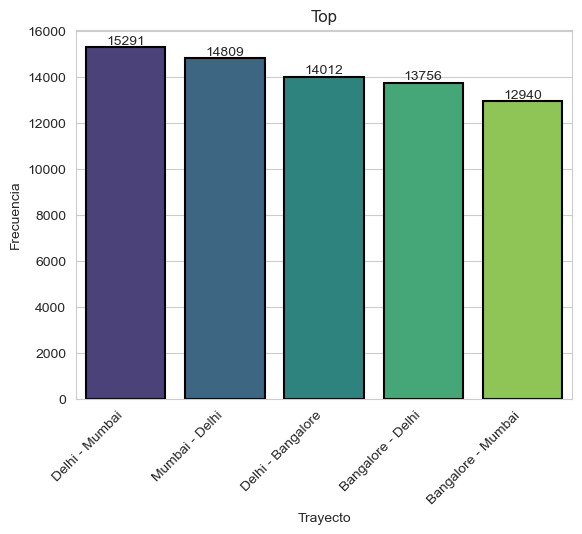

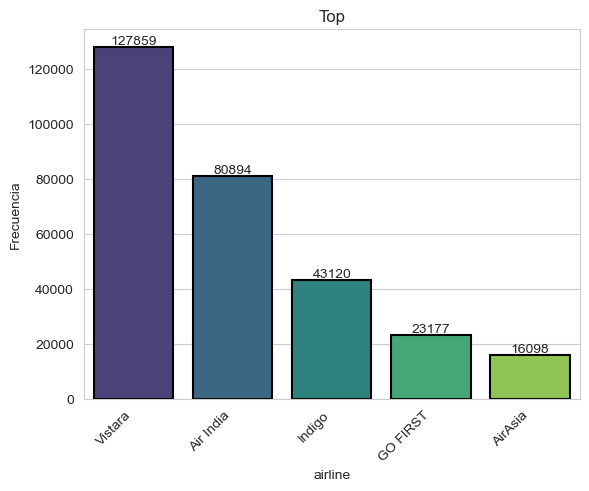

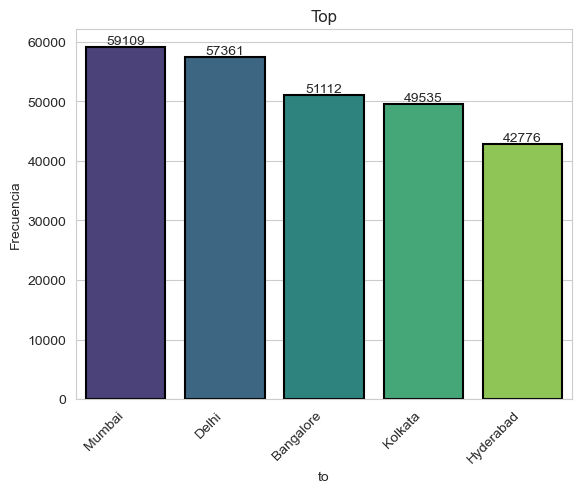

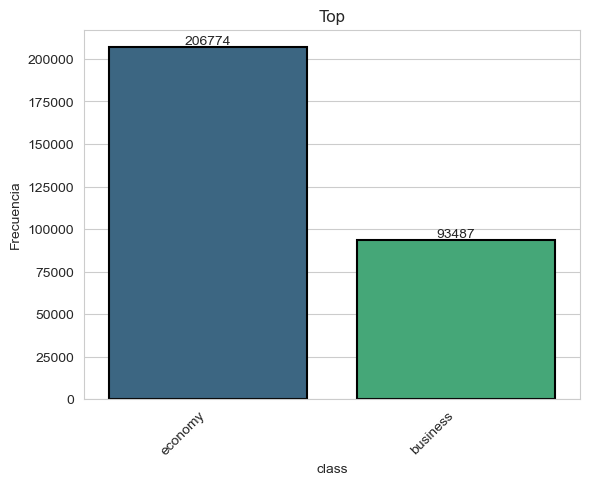

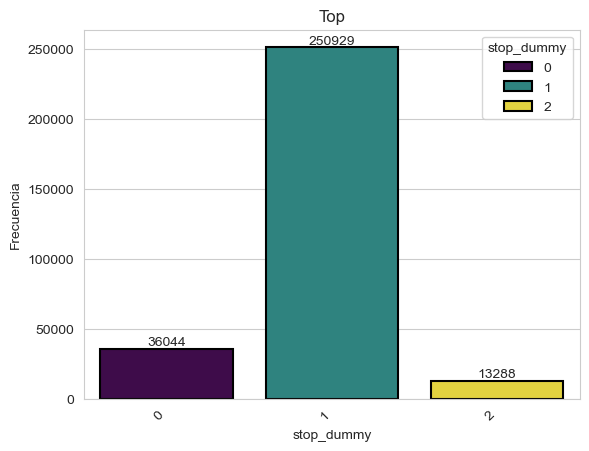

In [82]:
# Realizar estadistica descriptiva para darnos un contexto del sector
# Crear una lista con los nombres de las varibles de interés.
tops=['Trayecto','airline','to','class','stop_dummy']
#Iterar por las variables y sacar la lista del top 5 mas frecuntes
for top in tops:
  sns.set_style('whitegrid')
  top1=df3[top].value_counts().head(5)
  ax=sns.barplot(x=top1.index, y=top1.values, hue=top1.index,palette='viridis', edgecolor='black',linewidth=1.5)
  for i in range(len(ax.containers)):
      ax.bar_label(ax.containers[i])
  plt.title('Top')
  plt.xlabel(top)
  plt.xticks(rotation=45,ha='right')
  plt.ylabel('Frecuencia')
  plt.show()

### # Estadística descriptiva
## Los 5 Trayectos mas repetidos son:

1) Delhi-Mumbai.

2) Mumbai-Delhi.

3) Delhi-Kolkata.

4) Mumbai-Kolkata.

5) Kolkata-Delhi.

## Origenes y destinos :

**Mumbai, Delhi, Bangalore,Kolkata, Hyderabad** son tanto los destinos como los origenes más concurridos.

## Aerolineas

**Vistara, Air India** son las que presentan mas vuelos con respecto al resto nos hace pensar que son lideres del mercado.
**Indigo, GO FIRST,AirAsia** parecen ser las siguientes mas usadas y empresas mas locales que las dos anteriores.

## Distribucion de las clases y numeros de escalas


el **31 %** de los viajes fueron en clase business y el **69%** restante en economy.

el **12%** del total de los vuelos son con 0 escalas, **84%** con 1 escala, **4%** 2 escalas o mas.

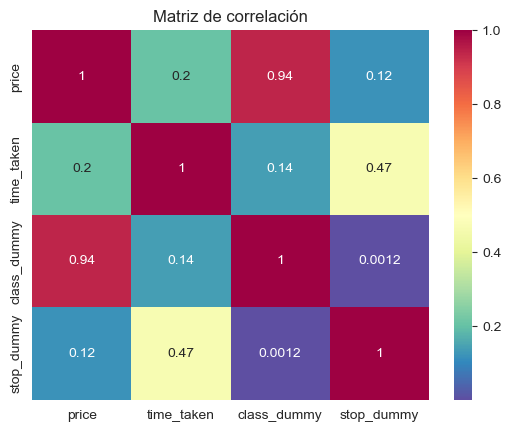

In [84]:
# Matriz de correlación
df_corr=df3[['price','time_taken','class_dummy','stop_dummy']]
corr=df_corr.corr()
sns.heatmap(corr,annot=True,cmap='Spectral_r')
plt.title('Matriz de correlación')
plt.show()

# Matriz de correlación

## Class dummy vs price

Como era de esperarse estar en clase business esta altamente correlacionado (0.94) de forma positiva con el precio del boleto,por norma general se espera que el boleto de clase business haga subir el precio con respecto al de clase economy(todo lo demas constante).


## Tiempo de vuelo vs stop dummy

Otra correlacion positiva moderada es la del tiempo de vuelo y el número de paradas, lo cual tiene sentido ya que entre mas largo sea un viaje tiene más posibilidades de ser hecho con varias escalas y visceversa.

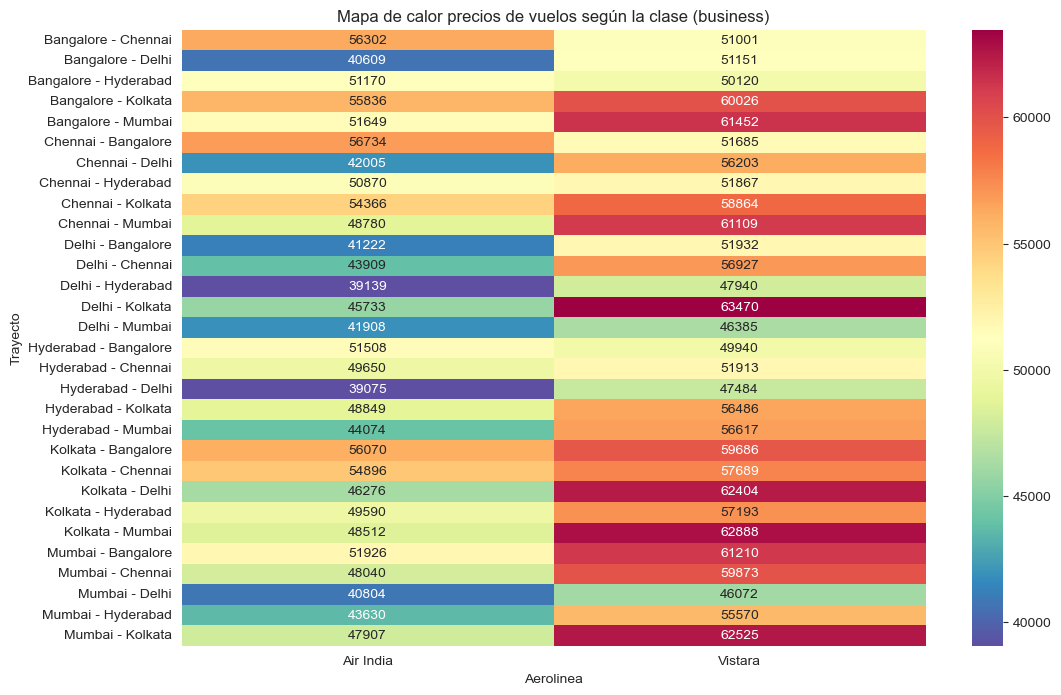

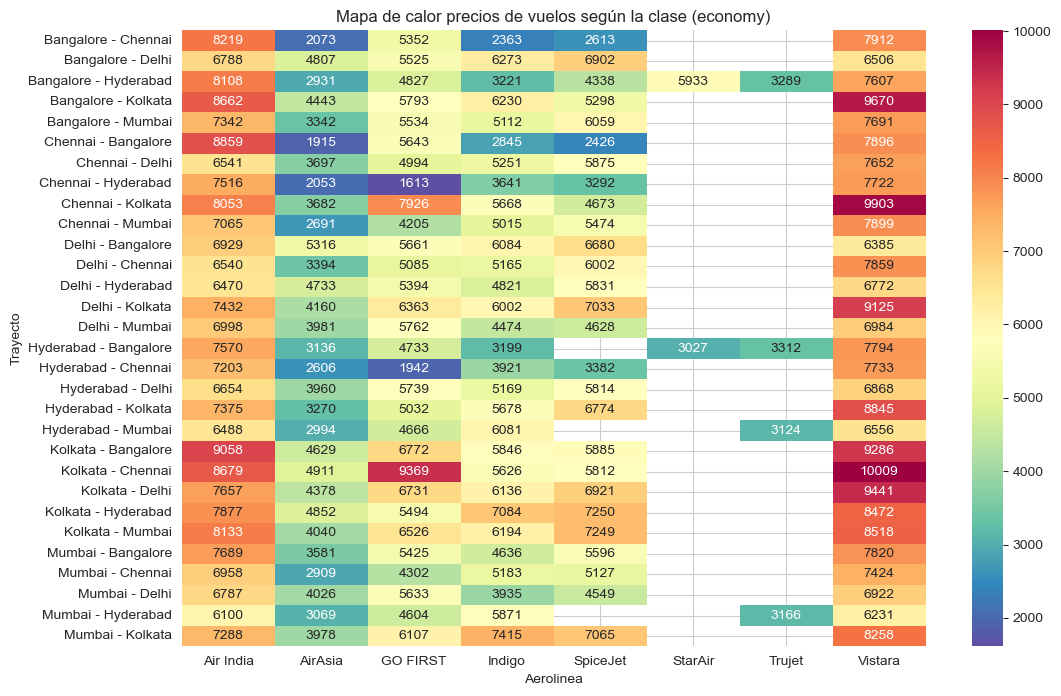

In [86]:
# Graficar un mapa de calor segun trayecto filtrando por clase.
Class=df3['class'].unique()
for i in Class:
  filtered_df = df3[df3['class'] == i]
  heatmap_data = filtered_df.pivot_table(values='price', index='Trayecto', columns='airline', aggfunc='mean')


  plt.figure(figsize=(12, 8))
  sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Spectral_r')
  plt.title('Mapa de calor precios de vuelos según la clase ('+i+')')
  plt.xlabel('Aerolinea')
  plt.ylabel('Trayecto')
  plt.show()

# Posicionamiento y estrategias de precios

Como podemos ver a primera vista las unicas aerolineas que tienen vuelos para todos los destinos y vuelos en business son **Air India y Vistara**, además se ve que su estrategia no se basa en competir por precios, seguramente compitan por la calidad de su servicio, lo cual para nosotros es indicador de que estas son las lideres del mercado y las demas son empresas mas pequeñas y/o locales. Cabe resaltar a **Air Asia** que al parecer tiene una estrategia agresiva de precios ya que en general mantiene precios mas bajos que sus competidores y los casos de **StairAir y Trujet** que se ven los peces mas pequeños del sector debido a los pocos trayectos que parecen tienen disponibles.

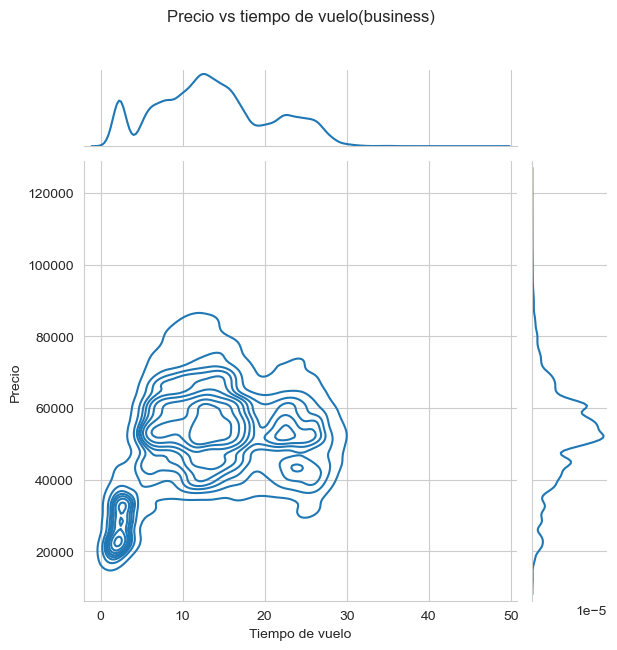

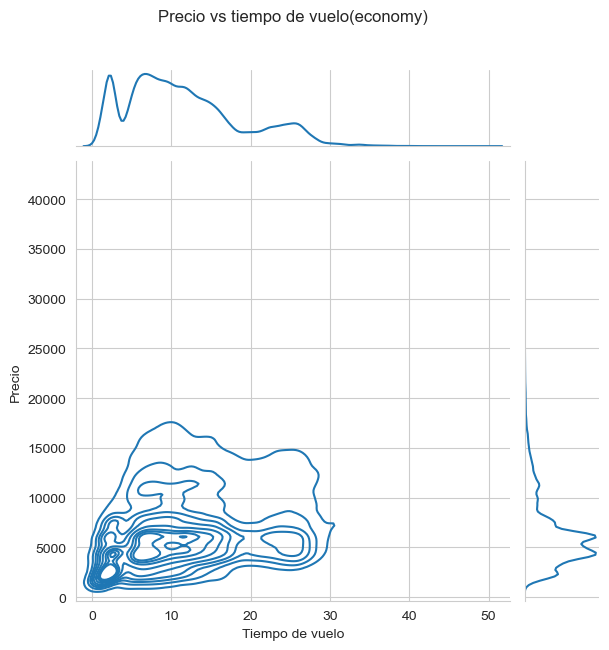

In [88]:
# Al ser la clase la mas correlacionada con el precio las comparaciones las hacemos distinguiendo por clase.
#Iteramos y graficamos por clase
for i in Class:
    filtered_df = df3[df3['class'] == i]
    sns.jointplot(y='price', x='time_taken', data=filtered_df, kind='kde')
    plt.title('Precio vs tiempo de vuelo('+ i +')',y=1.3)
    plt.xlabel('Tiempo de vuelo')
    plt.ylabel('Precio')
    plt.show()



# Tiempo de vuelo vs precio
Como podemos ver en el gráfico de densidad de nucleo existe una asimetria positiva en los vuelos de clase economy con respecto al tiempo, lo cual deja ver que en general para viajes cortos se escoge esta clase y/o que este tipo de cliente hace viajes mas cortos.

Tambien como es esperable la elasticidad del precio con respecto al tiempo de viaje en clase bussines es mayor a la de clase economy, es decir, a mayor tiempo de viaje aumenta en una mayor medida el precio en clase business que en clase economy.


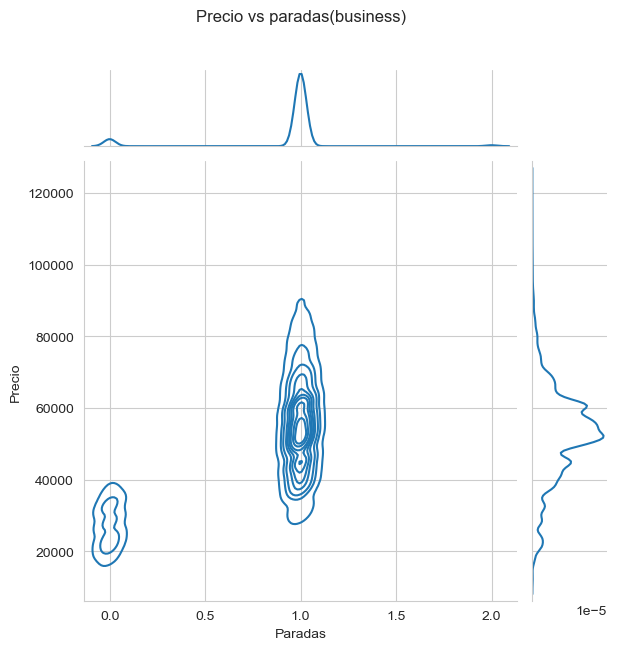

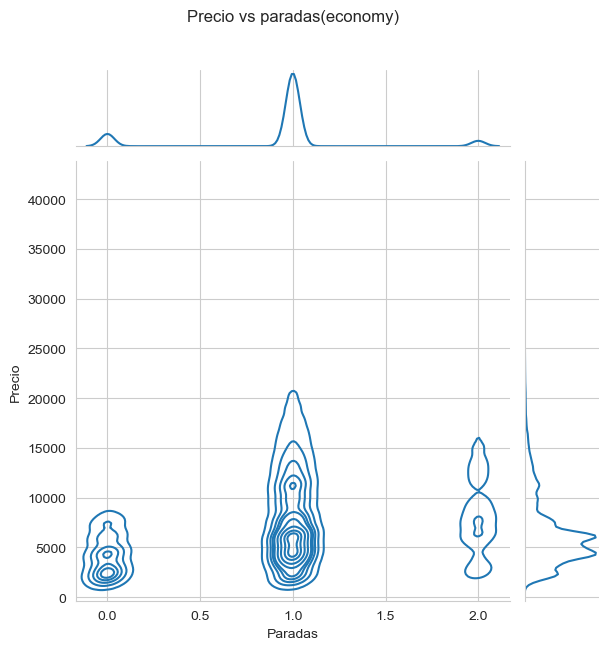

In [90]:
#Relacion entre el precio y el numero de paradas, filtrado por clase.
for i in Class:
  filtered_df = df3[df3['class'] == i]
  sns.jointplot(y='price', x='stop_dummy', data=filtered_df, kind='kde')
  plt.title('Precio vs paradas('+ i +')', y=1.3)
  plt.xlabel('Paradas')
  plt.ylabel('Precio')
  plt.show()

# Precio vs paradas
 La clase bussines no presenta 2 o mas paradas, lo cual es un reflejo que el cliente de esta, por lo general quiere trayectos mas directos y no le importa pagar más a costo de comodidad y la aerolina lo sabe y plantea de esta manera los trayectos.
